In [1]:
# NOTEBOOK:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import plotly.express as px
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
shelter_df = pd.read_csv('../Resources/aac_intakes_outcomes.csv')
shelter_df.head()
#shelter_df.columns


shelter_df["whole_shelter_days"] = np.ceil(shelter_df["time_in_shelter_days"])
print(shelter_df["whole_shelter_days"])
#shelter_df.head(22)
shelter_df.columns
#print(shelter_df['whole_shelter_days'].max())



0        1.0
1        2.0
2        2.0
3        5.0
4        1.0
        ... 
79667    1.0
79668    1.0
79669    1.0
79670    2.0
79671    1.0
Name: whole_shelter_days, Length: 79672, dtype: float64


Index(['age_upon_outcome', 'animal_id_outcome', 'date_of_birth',
       'outcome_subtype', 'outcome_type', 'sex_upon_outcome',
       'age_upon_outcome_(days)', 'age_upon_outcome_(years)',
       'age_upon_outcome_age_group', 'outcome_datetime', 'outcome_month',
       'outcome_year', 'outcome_monthyear', 'outcome_weekday', 'outcome_hour',
       'outcome_number', 'dob_year', 'dob_month', 'dob_monthyear',
       'age_upon_intake', 'animal_id_intake', 'animal_type', 'breed', 'color',
       'found_location', 'intake_condition', 'intake_type', 'sex_upon_intake',
       'count', 'age_upon_intake_(days)', 'age_upon_intake_(years)',
       'age_upon_intake_age_group', 'intake_datetime', 'intake_month',
       'intake_year', 'intake_monthyear', 'intake_weekday', 'intake_hour',
       'intake_number', 'time_in_shelter', 'time_in_shelter_days',
       'whole_shelter_days'],
      dtype='object')

In [3]:
# Data cleanup 

# getting rid of multiple animal ids
# Gets mean by id
grouped_animal_data = shelter_df.groupby(['animal_id_intake'])['whole_shelter_days'].mean()

grouped_animal_data = grouped_animal_data.reset_index()
grouped_animal_data = grouped_animal_data.merge(shelter_df, on=['animal_id_intake', 'whole_shelter_days'])
grouped_animal_data.head()

,animal_id_intake,whole_shelter_days,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,A047759,5.0,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,...,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
1,A134067,1.0,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,...,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444
2,A141142,1.0,15 years,A141142,1998-06-01 00:00:00,NaN,Return to Owner,Spayed Female,5475,15.0,...,"(12.5, 15.0]",2013-11-16 14:46:00,11,2013,2013-11,Saturday,14,1.0,0 days 20:54:00.000000000,0.870833
3,A163459,1.0,15 years,A163459,1999-10-19 00:00:00,NaN,Return to Owner,Intact Female,5475,15.0,...,"(12.5, 15.0]",2014-11-14 15:11:00,11,2014,2014-11,Friday,15,1.0,0 days 04:17:00.000000000,0.178472
4,A165752,1.0,15 years,A165752,1999-08-18 00:00:00,NaN,Return to Owner,Neutered Male,5475,15.0,...,"(12.5, 15.0]",2014-09-15 11:28:00,9,2014,2014-09,Monday,11,1.0,0 days 05:07:00.000000000,0.213194


In [4]:
# Gets list of dogs that were adopted as their outcome_type
adopted_dogs = grouped_animal_data.loc[(grouped_animal_data["animal_type"]=="Dog") & (grouped_animal_data["outcome_type"]=="Adoption")]
value_counts = adopted_dogs["breed"].value_counts()
value_counts = value_counts.reset_index()
value_counts = value_counts.rename(columns={'index': 'breed', 'breed': 'count'})
value_counts.head()
adopted_dogs.head()

,animal_id_intake,whole_shelter_days,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
9,A200922,50.0,16 years,A200922,1997-10-03 00:00:00,Foster,Adoption,Neutered Male,5840,16.0,...,"(15.0, 17.5]",2013-10-03 15:47:00,10,2013,2013-10,Thursday,15,1.0,49 days 17:57:00.000000000,49.747917
11,A210457,10.0,17 years,A210457,1999-06-01 00:00:00,Foster,Adoption,Neutered Male,6205,17.0,...,"(15.0, 17.5]",2016-09-28 12:05:00,9,2016,2016-09,Wednesday,12,1.0,9 days 00:29:00.000000000,9.020139
19,A226069,24.0,15 years,A226069,2000-06-17 00:00:00,Foster,Adoption,Neutered Male,5475,15.0,...,"(12.5, 15.0]",2015-10-06 12:29:00,10,2015,2015-10,Tuesday,12,1.0,23 days 02:31:00.000000000,23.104861
27,A249087,90.0,15 years,A249087,2001-01-02 00:00:00,Foster,Adoption,Spayed Female,5475,15.0,...,"(12.5, 15.0]",2016-08-17 14:05:00,8,2016,2016-08,Wednesday,14,1.0,89 days 20:32:00.000000000,89.855556
43,A274546,3.0,11 years,A274546,2002-05-25 00:00:00,NaN,Adoption,Spayed Female,4015,11.0,...,"(10.0, 12.5]",2013-11-13 18:16:00,11,2013,2013-11,Wednesday,18,1.0,2 days 18:08:00.000000000,2.755556


In [5]:
adopted_cats = grouped_animal_data.loc[(grouped_animal_data["animal_type"]=="Cat") & (grouped_animal_data["outcome_type"]=="Adoption")]
adopted_cats.head()

,animal_id_intake,whole_shelter_days,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
63,A295822,175.0,12 years,A295822,2002-09-09 00:00:00,NaN,Adoption,Spayed Female,4380,12.0,...,"(10.0, 12.5]",2014-11-16 14:14:00,11,2014,2014-11,Sunday,14,1.0,174 days 04:33:00.000000000,174.189583
75,A307592,22.0,12 years,A307592,2002-05-23 00:00:00,NaN,Adoption,Neutered Male,4380,12.0,...,"(10.0, 12.5]",2014-05-24 11:22:00,5,2014,2014-05,Saturday,11,1.0,21 days 03:53:00.000000000,21.161806
83,A312005,31.0,13 years,A312005,2001-07-02 00:00:00,NaN,Adoption,Neutered Male,4745,13.0,...,"(12.5, 15.0]",2014-09-18 13:11:00,9,2014,2014-09,Thursday,13,1.0,30 days 03:21:00.000000000,30.139583
88,A321341,58.0,10 years,A321341,2003-07-16 00:00:00,NaN,Adoption,Spayed Female,3650,10.0,...,"(7.5, 10.0]",2014-02-01 13:02:00,2,2014,2014-02,Saturday,13,1.0,57 days 03:36:00.000000000,57.150000
124,A348400,4.0,14 years,A348400,2002-11-25 00:00:00,NaN,Adoption,Spayed Female,5110,14.0,...,"(12.5, 15.0]",2017-07-17 13:09:00,7,2017,2017-07,Monday,13,1.0,3 days 23:00:00.000000000,3.958333


In [6]:
avg_days_by_dog_breed = adopted_dogs.groupby(['breed'])['whole_shelter_days'].mean()
avg_days_by_dog_breed = avg_days_by_dog_breed.reset_index()

adopted_dogs['age_upon_intake'] = adopted_dogs['age_upon_intake'].map(lambda sub: int(sub.split(' ', 1)[0]))
avg_age_by_dog_breed = adopted_dogs.groupby(['breed'])['age_upon_intake'].mean()
avg_age_by_dog_breed = avg_age_by_dog_breed.reset_index()

avg_days_by_dog_breed = avg_days_by_dog_breed.merge(value_counts, on=['breed'])
avg_days_age_breed = avg_days_by_dog_breed.merge(avg_age_by_dog_breed, on=['breed'])

avg_days_age_breed = avg_days_age_breed.sort_values(by=['count'], ascending=False)
avg_days_age_breed = avg_days_age_breed.rename(columns={'whole_shelter_days': 'avg_time_in_shelter', 'age_upon_intake': 'avg_age_upon_intake'})
avg_days_age_breed = avg_days_age_breed.loc[avg_days_by_dog_breed['count'] >= 120]
avg_days_age_breed.head(22)

,breed,avg_time_in_shelter,count,avg_age_upon_intake
409,Chihuahua Shorthair Mix,18.029412,1870,3.375936
753,Labrador Retriever Mix,24.775987,1799,3.148416
952,Pit Bull Mix,51.935792,1464,3.132514
622,German Shepherd Mix,19.905054,653,3.166922
62,Australian Cattle Dog Mix,26.257271,447,3.382550
517,Dachshund Mix,11.981308,321,3.610592
238,Border Collie Mix,17.284091,264,3.303030
864,Miniature Poodle Mix,11.654545,220,3.668182
285,Boxer Mix,33.068966,203,3.290640
116,Australian Shepherd Mix,15.879781,183,3.060109


Text(0.5, 1.0, 'Average Time Spent In Shelter Before Adoption')

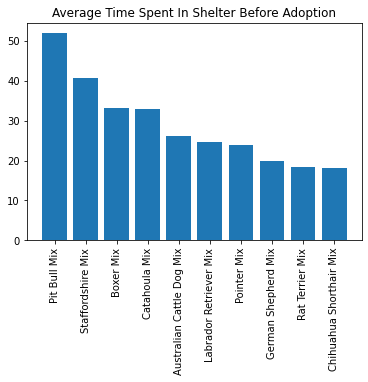

In [7]:
avg_days_age_breed = avg_days_age_breed.sort_values(by=['avg_time_in_shelter'], ascending=False)
top_ten_most_time = avg_days_age_breed.head(10)
plt.bar(x=top_ten_most_time['breed'], height=top_ten_most_time['avg_time_in_shelter'])
plt.xticks(rotation='vertical')
plt.title('Average Time Spent In Shelter Before Adoption')


In [8]:
print(avg_days_age_breed['avg_time_in_shelter'].mean())

21.017477436246082


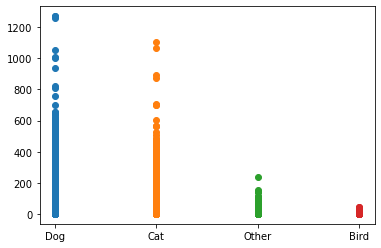

In [9]:
animal_types = shelter_df["animal_type"].unique()

for animal in animal_types:
    animal_df = shelter_df.loc[(shelter_df["animal_type"]==animal) & (shelter_df["outcome_type"]=='Adoption')]
    x = animal_df["animal_type"]
    y = animal_df["whole_shelter_days"]
    plt.scatter(x,y)
plt.show()